This notebook contains design, implementation and comparision of different clustering models applied to Rivers dataset.

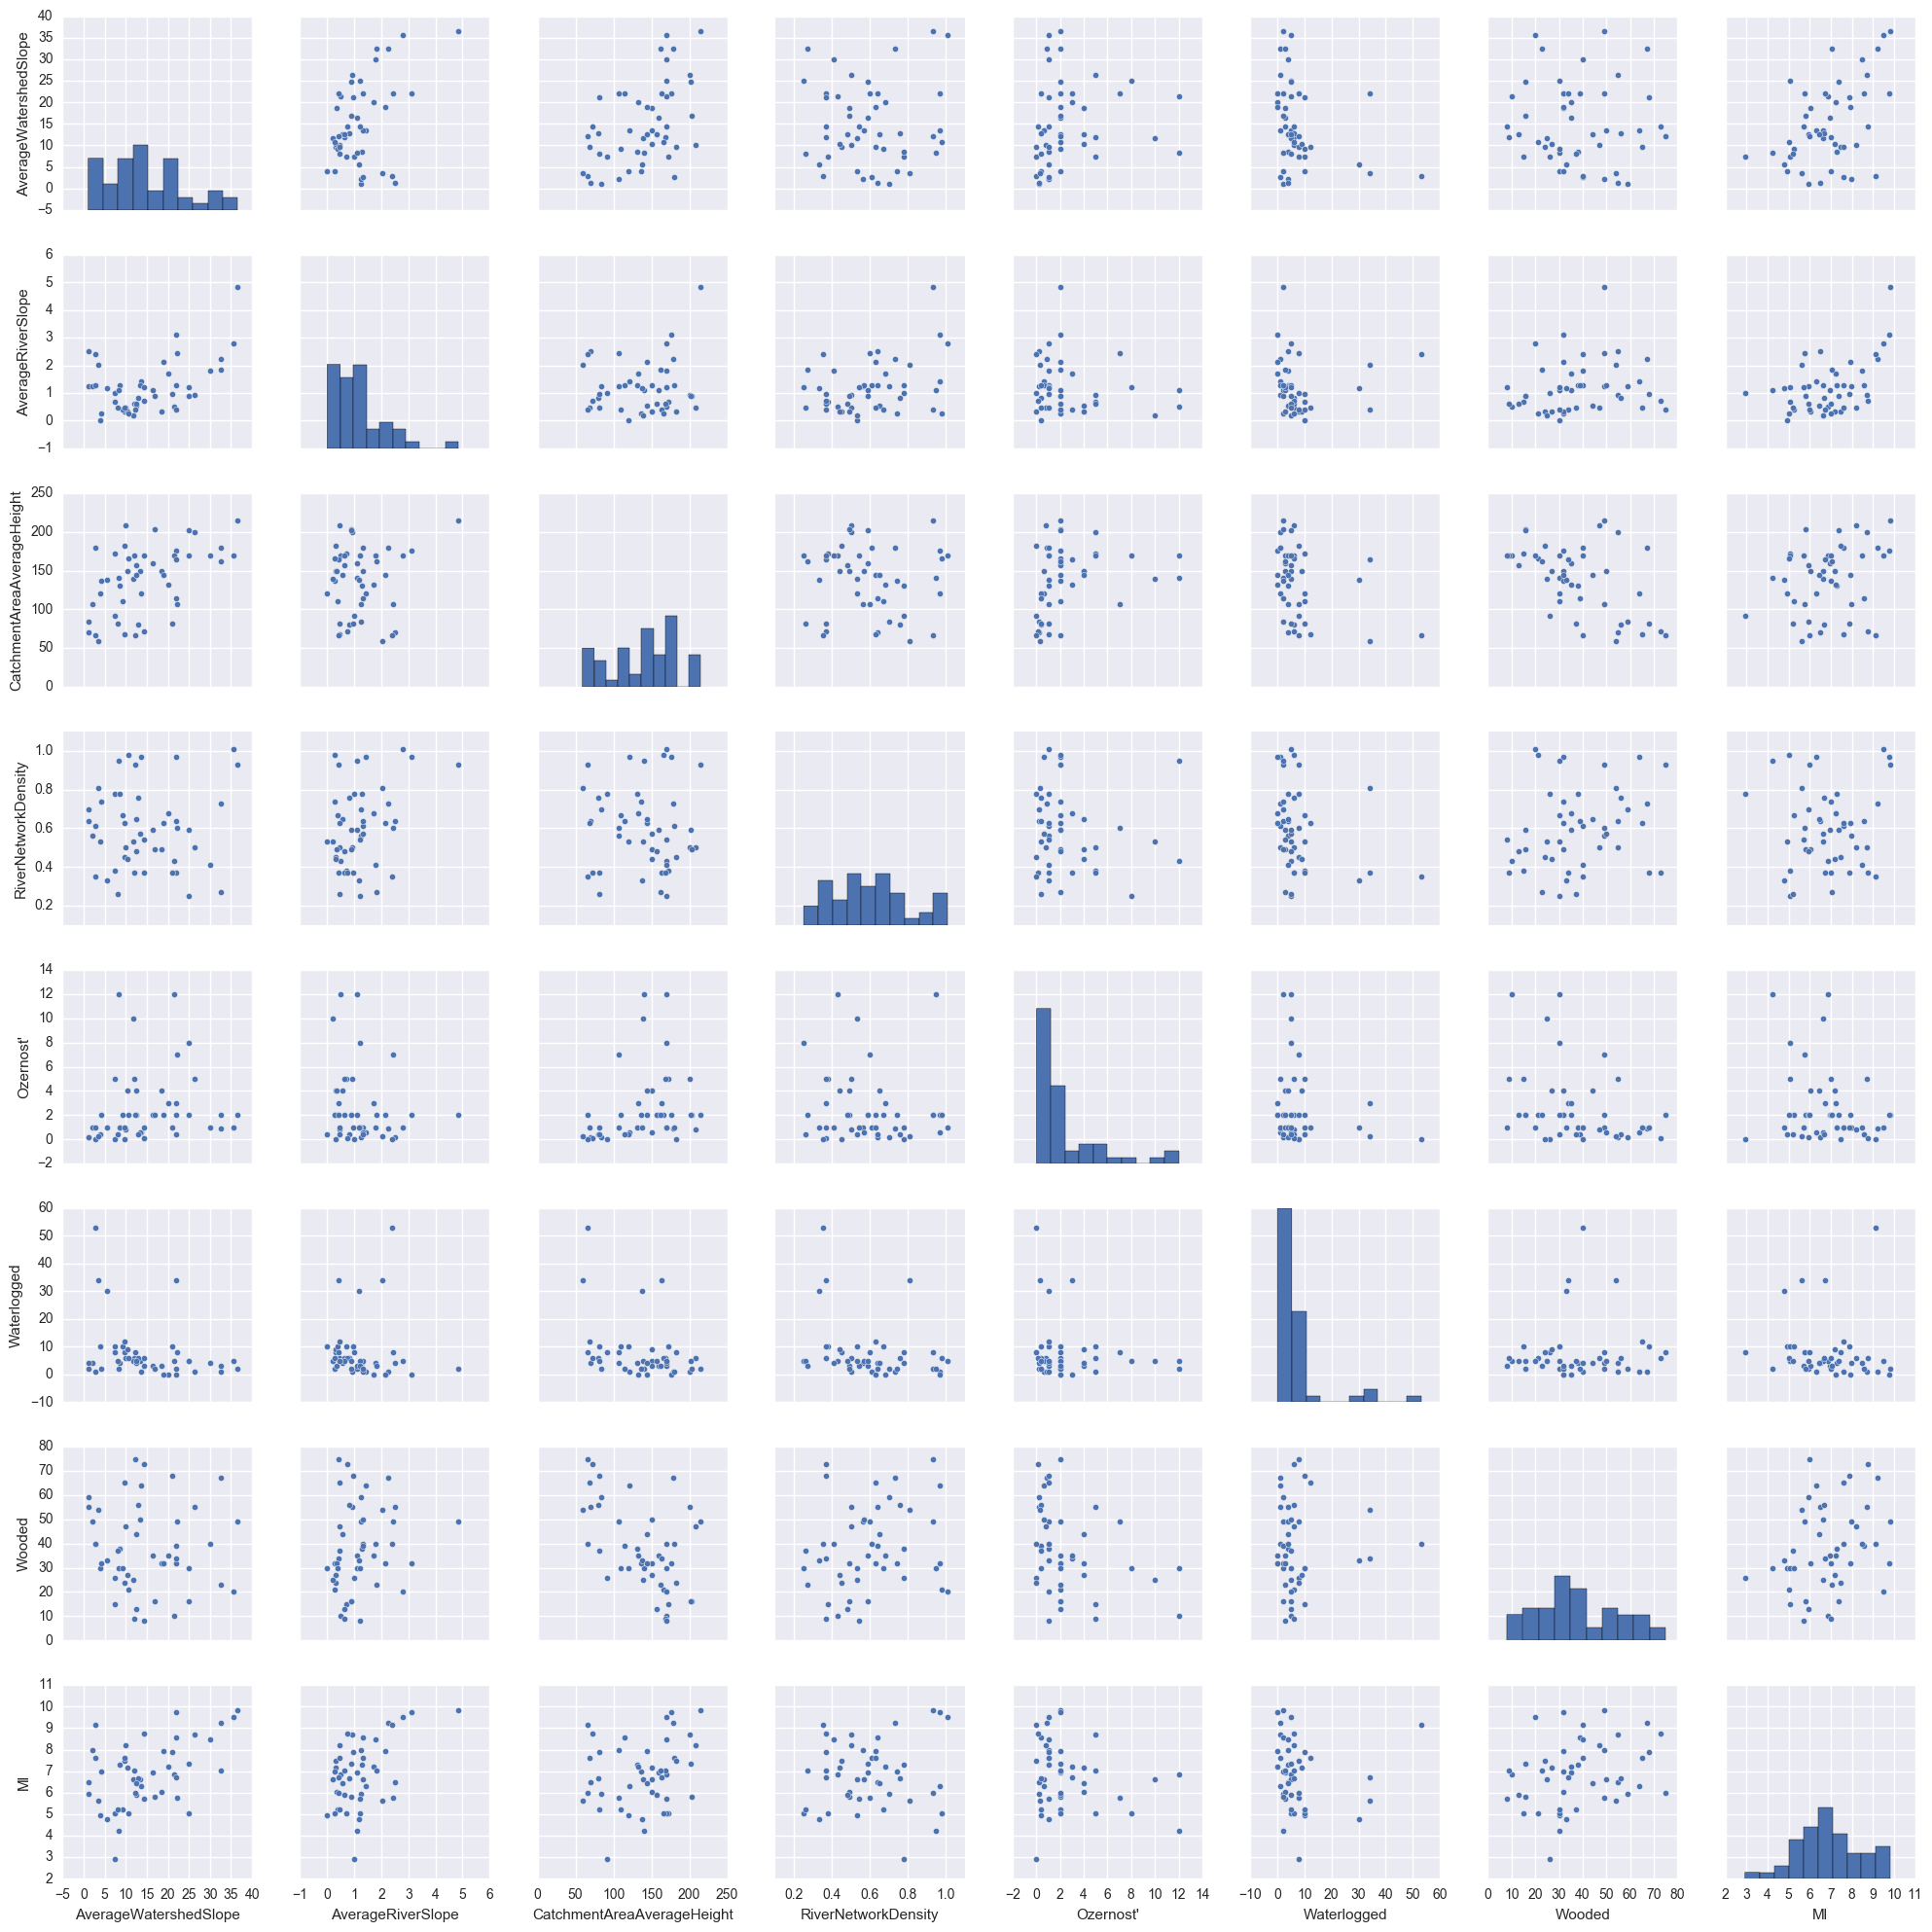

In [2]:
import numpy as np
import pandas as pd
import random
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#Load data
rivers = pd.read_csv('rivers.csv')

#Drop Id and Name columns
river_names = rivers["River"]
rivers.drop(rivers.columns[[0,1]], axis=1, inplace=True)

#Filling NaNs
rivers["AverageRiverSlope"].fillna(0, inplace=True)
rivers["Ml"].fillna(rivers["Ml"].mean(), inplace=True)
rivers['RiverNetworkDensity'] = rivers['RiverNetworkDensity'].apply(lambda x: round(random.uniform(0.25, 1.01), 2) if pd.isnull(x) else x)
rivers["Waterlogged"] = rivers["Waterlogged"] = [str(round(random.uniform(0.1, 0.9), 1)) if x=='<1' else str(random.randint(1,4)) if x=='<5' else x for x in rivers["Waterlogged"]]
rivers["Ozernost'"] = [np.NaN if (x=='<1') else x for x in rivers["Ozernost'"]]
rivers["Ozernost'"] = [round(random.uniform(0.1, 0.9), 1) if pd.isnull(x) else x for x in rivers["Ozernost'"]]
for col in  rivers.columns[4:6]:
    rivers[col] = pd.to_numeric(rivers[col], errors='coerce')

#Pair plots for all features     
sns.pairplot(rivers, size=2.5);

More plots...

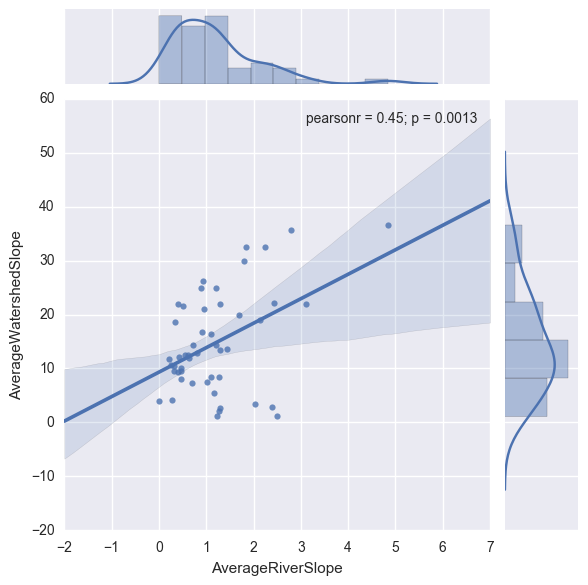

In [4]:
sns.jointplot("AverageRiverSlope", "AverageWatershedSlope", rivers, kind='reg');

Checking correlation

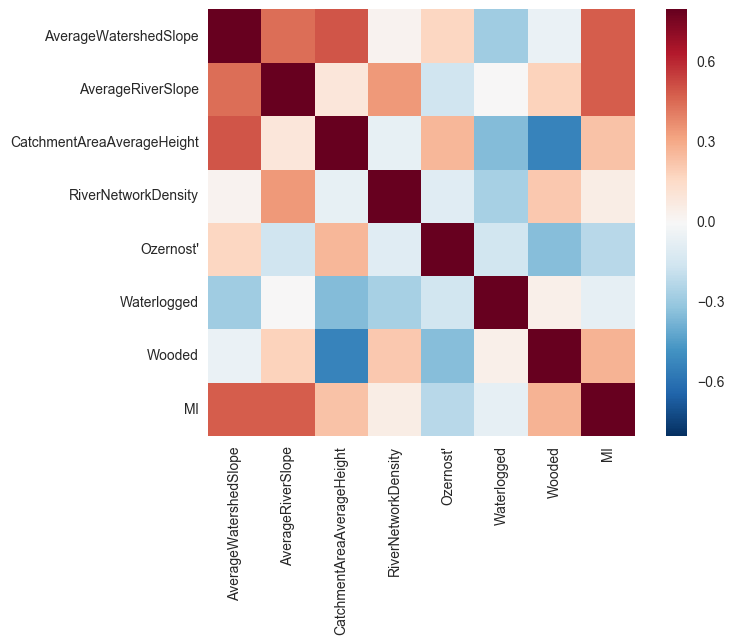

In [5]:
corrmat = rivers.corr()
sns.heatmap(corrmat, vmax=.8, square=True)

Now make some magic

In [9]:
from sklearn.cluster import KMeans
kmeans02 = KMeans(n_clusters=2, random_state=0).fit(rivers)
kmeans03 = KMeans(n_clusters=3, random_state=0).fit(rivers)

Now show pair plots with separation by 2 and 3 clusters

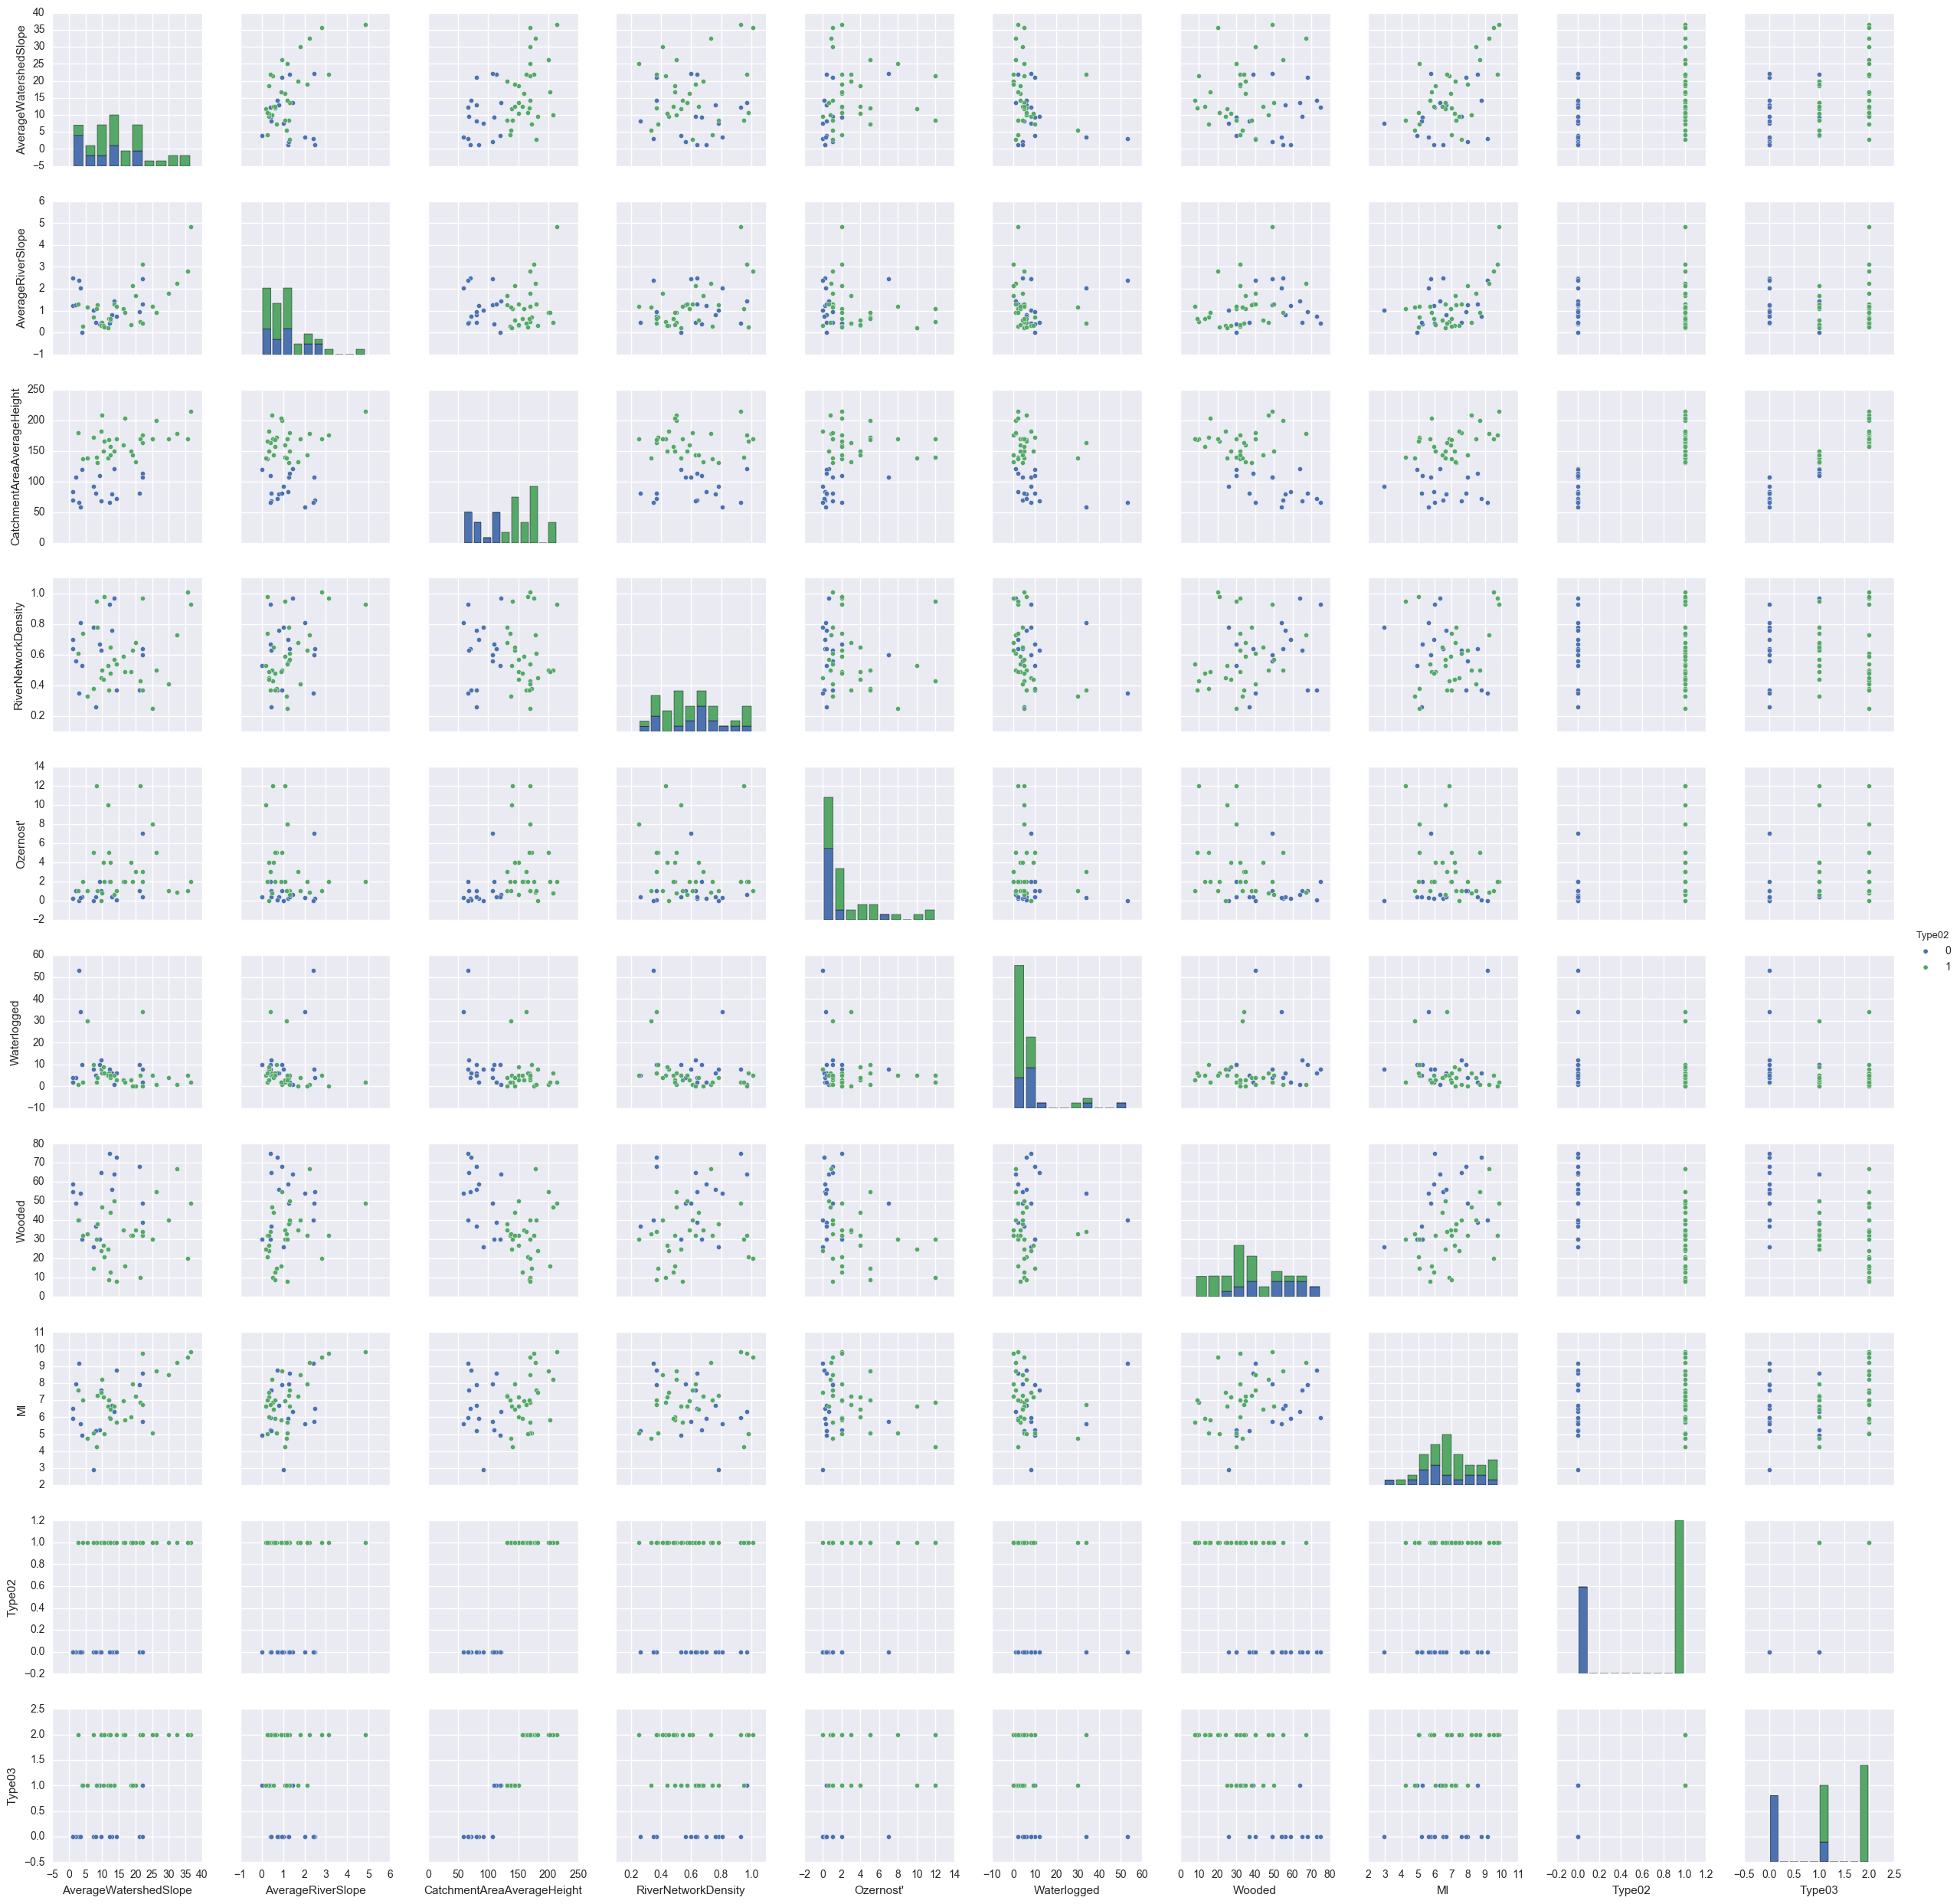

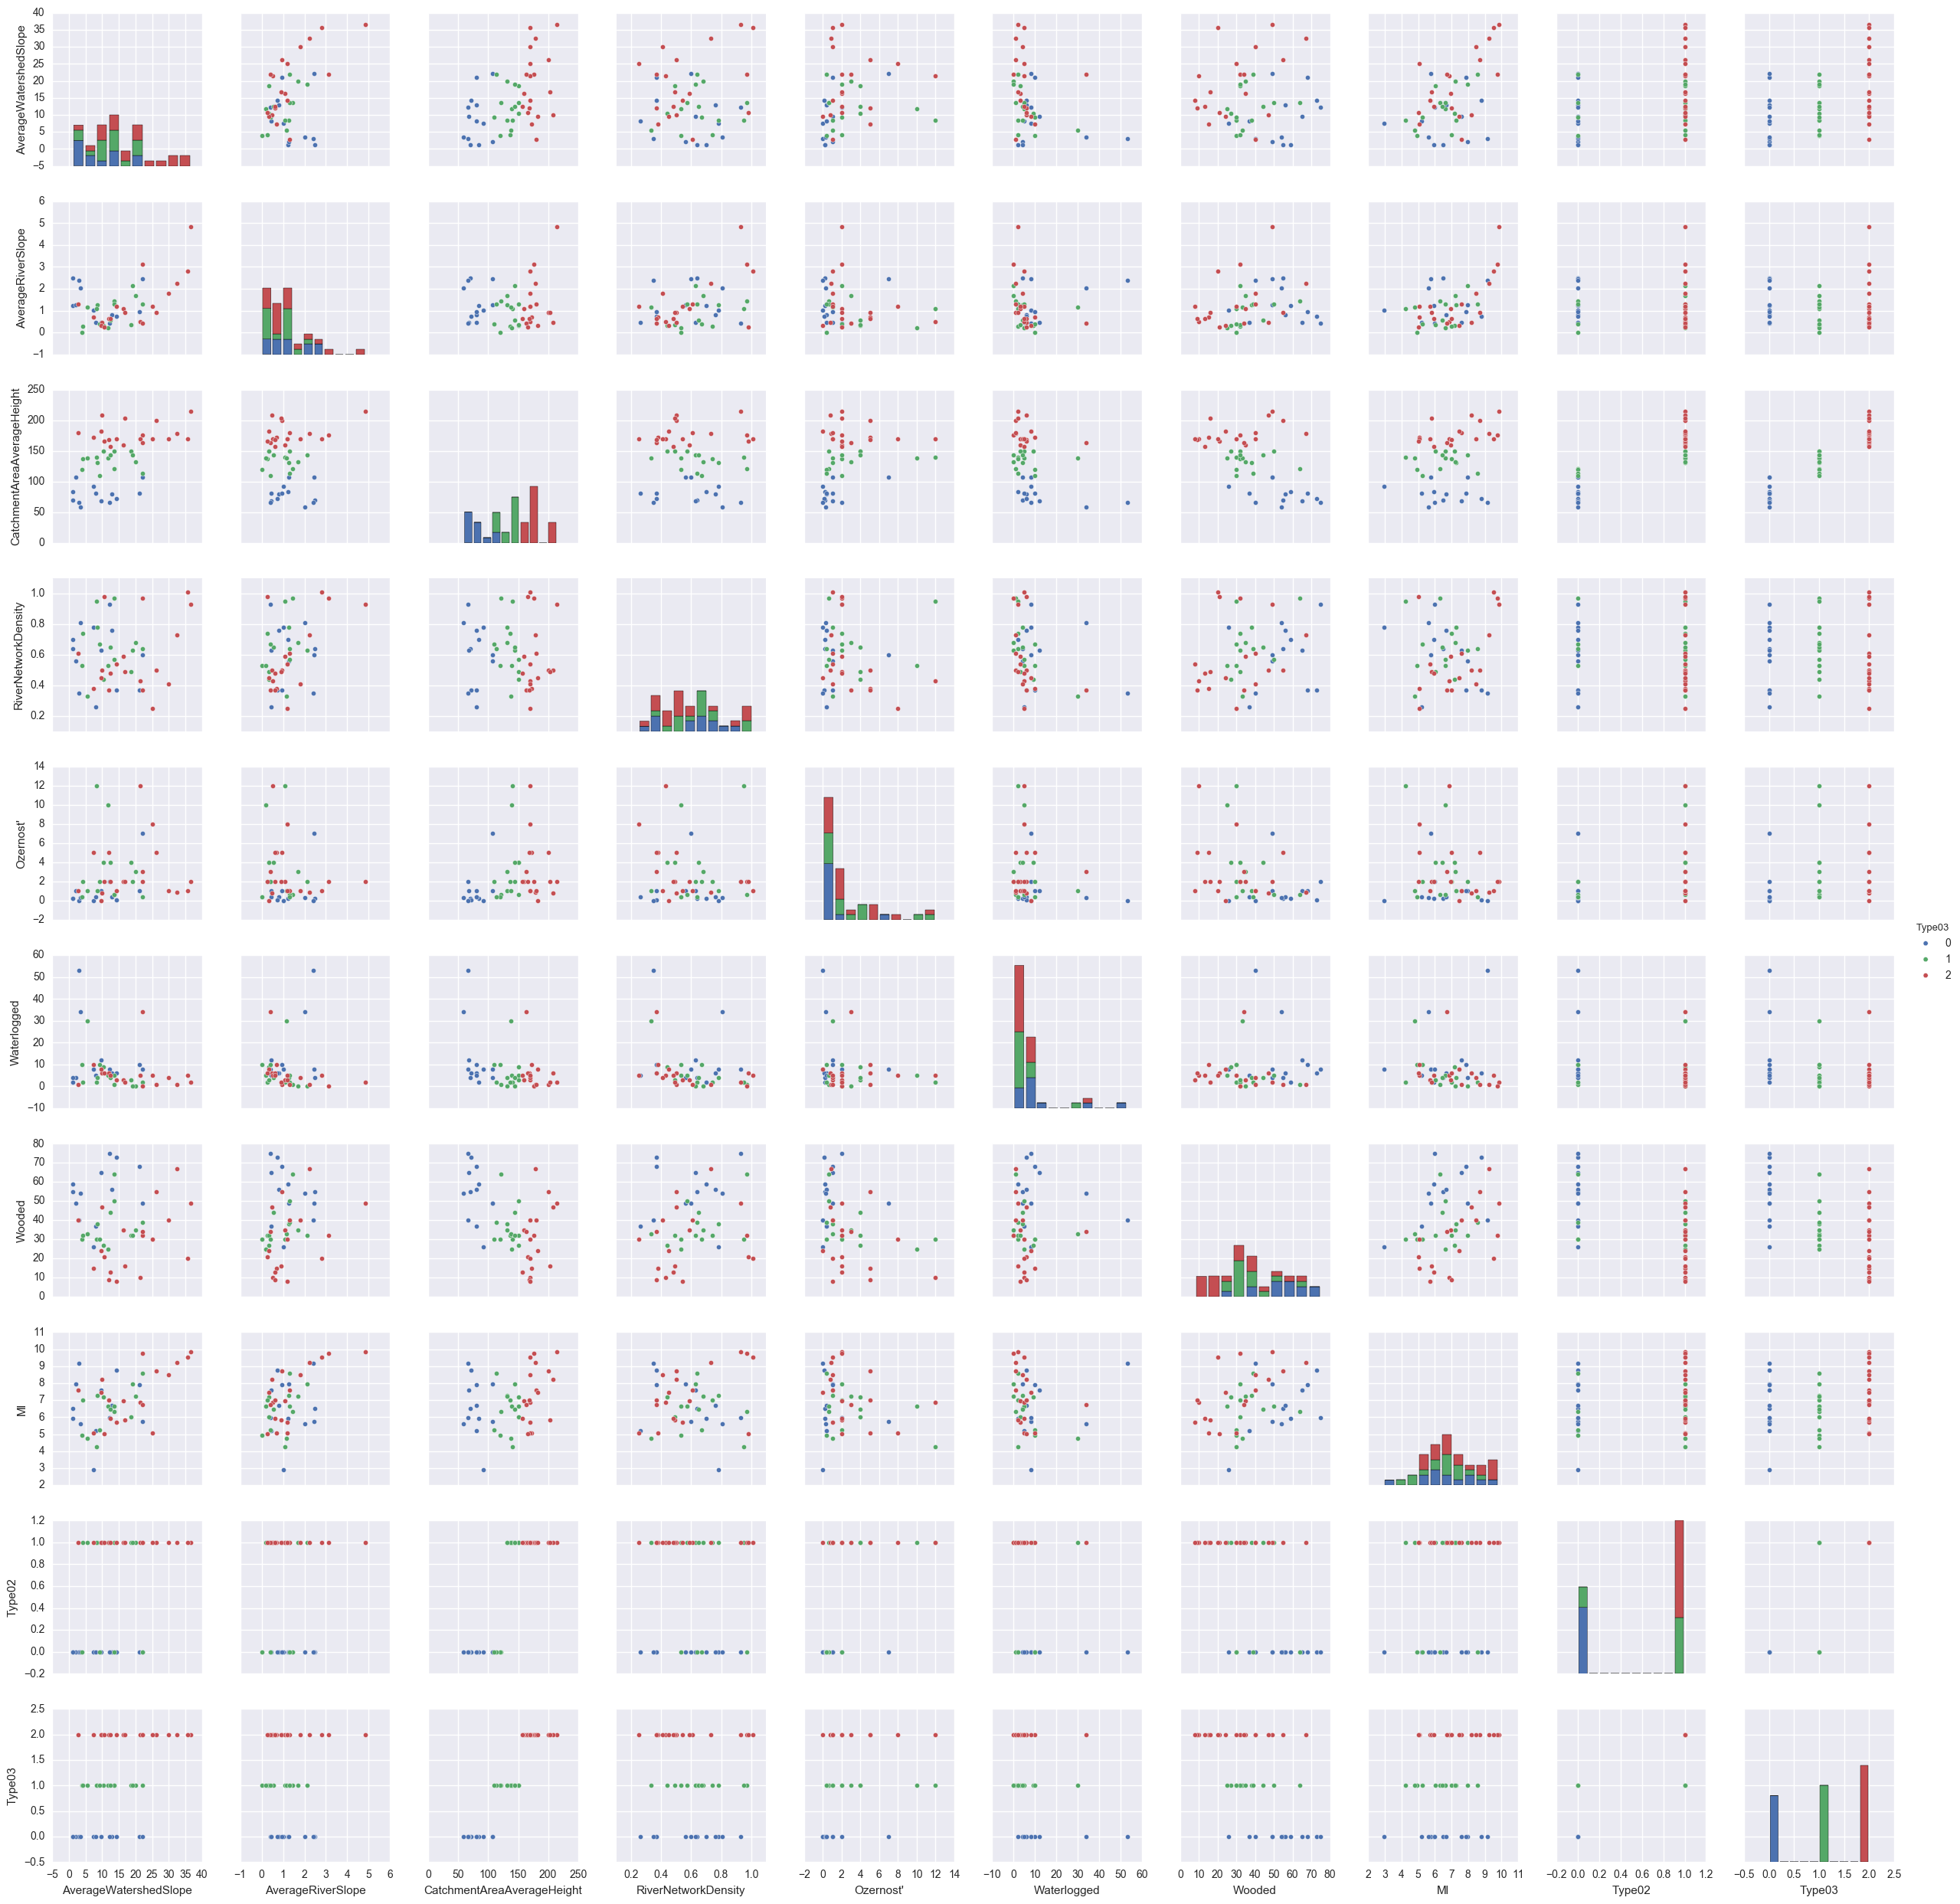

In [10]:
rivers["Type02"] = kmeans02.labels_
rivers["Type03"] = kmeans03.labels_

sns.pairplot(rivers[:-2], hue="Type02", size=2.5);
sns.pairplot(rivers[:-2], hue="Type03", size=2.5);